# Jupyter Notebook (1437889)

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

## Multilayer Perceptron

In [12]:
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    def forward_propagation(self, input):
        raise NotImplementedError
        
    def backward_propagation(self, output_error, learning_rate):
        raise NotImplementedError

In [13]:
class FCLayer(Layer):
    # input_size = number of input neurons
    # output_size = number of output neurons
    def __init__(self, input_size, output_size):
        self.weights = np.random.rand(input_size, output_size) - 0.5
        self.bias = np.ones((1,output_size))

    # returns output for a given input
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output

    def backward_propagation(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)
        # dBias = output_error

        # update parameters
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error

In [14]:
class ActivationLayer(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    # returns the activated input
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = self.activation(self.input)
        return self.output

    def backward_propagation(self, output_error, learning_rate):
        return self.activation_prime(self.input) * output_error

In [15]:
# activation function and its derivative
def tanh(x):
    return np.tanh(x);

def tanh_prime(x):
    return 1-np.tanh(x)**2;

In [16]:
# loss function and its derivative
def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2));

def mse_prime(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size;

In [18]:
class Network:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None

    # add layer to network
    def add(self, layer):
        self.layers.append(layer)

    # set loss to use
    def error(self, loss, loss_prime):
        self.loss = loss
        self.loss_prime = loss_prime

    # predict output for given input
    def predict(self, input_data):
        # sample dimension first
        samples = len(input_data)
        result = []

        # run network over all samples
        for i in range(samples):
            # forward propagation
            out = input_data[i]
            for layer in self.layers:
                out = layer.forward_propagation(out)
            result.append(out)

        return result

    # train the network
    def fit(self, x_train, y_train, epochs, learning_rate):
        # training loop
        for i in range(epochs):
            err = 0
            for j in range(len(x_train)):
                # forward propagation
                out = x_train[j]
                for layer in self.layers:
                    out = layer.forward_propagation(out)

                # compute loss (for display purpose only)
                err += self.loss(y_train[j], out)

                # backward propagation
                error = self.loss_prime(y_train[j], out)
                for layer in reversed(self.layers):
                    error = layer.backward_propagation(error, learning_rate)

            # calculate average error on all samples
            err /= len(x_train)
            print('epoch %d/%d   error=%f' % (i+1, epochs, err))

In [8]:
df = pd.read_csv('vgsales-12-4-2019-short.csv', usecols = ['Name','Genre','Platform','Publisher','Developer','Year','Global_Sales'])
display(df)

,Name,Genre,Platform,Publisher,Developer,Global_Sales,Year
0,Wii Sports,Sports,Wii,Nintendo,Nintendo EAD,NaN,2006.0
1,Super Mario Bros.,Platform,NES,Nintendo,Nintendo EAD,NaN,1985.0
2,Mario Kart Wii,Racing,Wii,Nintendo,Nintendo EAD,NaN,2008.0
3,PlayerUnknown's Battlegrounds,Shooter,PC,PUBG Corporation,PUBG Corporation,NaN,2017.0
4,Wii Sports Resort,Sports,Wii,Nintendo,Nintendo EAD,NaN,2009.0
...,...,...,...,...,...,...,...
55787,Indivisible,Role-Playing,PC,505 Games,Lab Zero Games,NaN,2019.0
55788,Lost Ember,Adventure,PC,Mooneye Studios,Mooneye Studios,NaN,2019.0
55789,Lost Ember,Adventure,PS4,Mooneye Studios,Mooneye Studios,NaN,2019.0
55790,Lost Ember,Adventure,XOne,Mooneye Studios,Mooneye Studios,NaN,2019.0


In [12]:
np.random.seed(42)
#Drop all records with no values
df.dropna(inplace = True)
#Only select records which with global sales greater than 0
df = df[df['Global_Sales'] > 0]
#Normalize Year
df['Year'] = (df['Year']- df['Year'].min())/(df['Year'].max()-df['Year'].min())
df = pd.get_dummies(df, columns=['Genre','Platform','Publisher','Developer'],prefix= '', prefix_sep='')
#Sort columns
ls = []
for i in range(len(df.columns)):
    if i != 1:
        ls.append(df.columns[i])
ls.append(df.columns[1])
df = df[ls]
display(df)

,Name,Year,Action,Action-Adventure,Adventure,Board Game,Education,Fighting,MMO,Misc,...,oeFun,"responDESIGN, Inc.",skip Ltd.,syn Sophia,thatgamecompany,thumbfood Ltd.,tri-Ace,tri-Crescendo / Monolith Soft,zSlide,Global_Sales
19,Grand Theft Auto V,0.86,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20.32
20,Grand Theft Auto V,0.88,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19.39
30,Grand Theft Auto: Vice City,0.64,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16.15
32,Grand Theft Auto V,0.86,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15.86
34,Call of Duty: Black Ops 3,0.90,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19857,FirePower for Microsoft Combat Flight Simulator 3,0.68,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.01
19858,Tom Clancy's Splinter Cell,0.66,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.01
19859,Ashita no Joe 2: The Anime Super Remix,0.64,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.01
19860,Tokyo Yamanote Boys for V: Main Disc,0.94,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.01


In [ ]:
#Split data into features and target
x = df[ls[1:-1]].to_numpy()[:,np.newaxis]
y = df[ls[-1]].to_numpy().reshape(-1,1)
#Split into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state = 42)
#Split into training and validation data
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=42)#Validation data of 10% (15% of 67%)

#### Fitting and Predicting Network with 300 hidden nodes

In [ ]:
#Initialise Neural Network 300 nodes
net300 = Network()
n_hidden_nodes = 300 
#Input layer
net300.add(FCLayer(x.shape[-1], n_hidden_nodes))
net300.add(ActivationLayer(tanh, tanh_prime))
#hidden layers
net300.add(FCLayer(n_hidden_nodes, n_hidden_nodes))
net300.add(ActivationLayer(tanh, tanh_prime))
net300.add(FCLayer(n_hidden_nodes, n_hidden_nodes))
net300.add(ActivationLayer(tanh, tanh_prime))
#Output layer
net300.add(FCLayer(n_hidden_nodes, 1))
net300.error(mse, mse_prime)
net300.fit(x_train,y_train, epochs = 100, learning_rate = 0.001)

#Save results for validation and training
y_pred = np.array(net300.predict(x_test)).reshape(-1,1)
np.savetxt('data_test300.csv', y_pred, delimiter=',')
y_pred = np.array(net300.predict(x_train)).reshape(-1,1)
np.savetxt('data_train300.csv', y_pred,delimiter =',')
y_pred = np.array(net300.predict(x_val)).reshape(-1,1)
np.savetxt('data_val300.csv', y_pred, delimiter =',')

#### Fitting and Predicting Network with 500 hidden nodes

In [ ]:
#Initialise Neural Network 500 nodes
net500 = Network()
n_hidden_nodes = 500 
#Input layer
net500.add(FCLayer(x.shape[-1], n_hidden_nodes))
net500.add(ActivationLayer(tanh, tanh_prime))
#hidden layers
net500.add(FCLayer(n_hidden_nodes, n_hidden_nodes))
net500.add(ActivationLayer(tanh, tanh_prime))
net500.add(FCLayer(n_hidden_nodes, n_hidden_nodes))
net500.add(ActivationLayer(tanh, tanh_prime))
#Output layer
net500.add(FCLayer(n_hidden_nodes, 1))
#Took out activation function here
net500.error(mse, mse_prime)
net500.fit(x_train,y_train, epochs = 100, learning_rate = 0.001)

y_pred = np.array(net500.predict(x_test)).reshape(-1,1)

np.savetxt('data_test500.csv', y_pred, delimiter=',')
y_pred = np.array(net500.predict(x_train)).reshape(-1,1)
np.savetxt('data_train500.csv', y_pred,delimiter =',')
y_pred = np.array(net500.predict(x_val)).reshape(-1,1)
np.savetxt('data_val500.csv', y_pred, delimiter =',')

epoch 1/35   error=1.081403
epoch 2/35   error=1.085694
epoch 3/35   error=1.085617
epoch 4/35   error=1.085451
epoch 5/35   error=1.085407
epoch 6/35   error=1.085201
epoch 7/35   error=1.085063
epoch 8/35   error=1.084329
epoch 9/35   error=1.060093
epoch 10/35   error=0.930467
epoch 11/35   error=0.762011
epoch 12/35   error=0.679390
epoch 13/35   error=0.646335
epoch 14/35   error=0.629060
epoch 15/35   error=0.617304
epoch 16/35   error=0.608237
epoch 17/35   error=0.600815
epoch 18/35   error=0.594541
epoch 19/35   error=0.589106
epoch 20/35   error=0.584302
epoch 21/35   error=0.579991
epoch 22/35   error=0.576075


#### Cross Validation

In [20]:
#Read in saved data
y_train_300 = pd.read_csv('data_train300.csv', header=None).to_numpy()
y_train_500 = pd.read_csv('data_train500.csv', header=None).to_numpy()
y_val_300 = pd.read_csv('data_val300.csv', header=None).to_numpy()
y_val_500 = pd.read_csv('data_val500.csv',header=None).to_numpy()
#Make negative values zero
for i in range(len(y_train_300)):
    if y_train_300[i] < 0:
        y_train_300[i] = 0
for i in range(len(y_train_500)):
    if y_train_500[i] < 0:
        y_train_500[i] = 0
for i in range(len(y_val_300)):
    if y_val_300[i] < 0:
        y_val_300[i] = 0
for i in range(len(y_val_500)):
    if y_val_500[i] < 0:
        y_val_500[i] = 0

#Calculation of metrics
r2_val_300 = r2_score(y_val,y_val_300)
r2_val_500 = r2_score(y_val,y_val_500)

mse_train_300 = mean_squared_error(y_train,y_train_300)
mse_train_500 = mean_squared_error(y_train,y_train_500)
mse_val_300 = mean_squared_error(y_val,y_val_300)
mse_val_500 = mean_squared_error(y_val,y_val_500)
print("MSE for 300 nodes validation data:",mse_val_300)
print("MSE for 500 nodes validation data:",mse_val_500)
print("R2 score for 300 nodes validation data:",r2_val_300)
print("R2 score for 500 nodes validation data:",r2_val_500)


NameError: name 'y_val' is not defined

#### Testing Selected Model

In [21]:
y_test_300 = pd.read_csv('data_test300.csv', header=None).to_numpy()

#Make any negative values zero
for i in range(len(y_test_300)):
    if y_test_300[i] < 0:
        y_test_300[i] = 0


mse_test_300 = mean_squared_error(y_test,y_test_300)
r2_train_300 = r2_score(y_train,y_train_300)
r2_test_300 = r2_score(y_test,y_test_300)
print("MSE for training data:",mse_train_300)
print("MSE for test data:",mse_test_300)
print("R2 score for training data:",r2_train_300)
print("R2 score for testing data:",r2_test_300)

a = np.hstack((y_test_300,y_test))
difference = y_test_300 - y_test
a = np.hstack((a,difference))
table = pd.DataFrame(a, columns=['Predicted', 'Target','Error'])
table.head(10)

NameError: name 'y_test' is not defined

## Multiple Linear Regression

In [76]:
def cost_function(X,Y,B):
    N = len(Y)
    J = np.sum((X.dot(B) - Y)**2)/(2*N)
    return J

def gradient_descent(X, Y, alpha, B, i):
    N = len(Y)
    h = X.dot(B)
    loss = h - Y
    gradient = X.T.dot(loss)/N
    B = B - alpha*gradient
    cost = cost_function(X, Y, B)
#     if ((i % 100) == 0) or (i ==1):
#         print('Iteration',i,' error:', cost)
    return B, cost
class Multivariate_Regression:

    def __init__(self,alpha, iteration):
        self.alpha = alpha
        self.iterations = iteration
        self.history = []

    def fit(self, x, y):
        self.bias = np.ones((x.shape[1],1))
        N = len(y)
        h = x.dot(self.bias)
        i = 1
        while ((i <= self.iterations)):
            self.bias,cost = gradient_descent(x, y, self.alpha, self.bias, i)
            i += 1
            self.history.append(cost)
    def predict(self,x):
        return x.dot(self.bias)
    

In [110]:
#Reformat data for Multivariate Regression
x_train = x_train.reshape(-1,x.shape[2])
x_test = x_test.reshape(-1,x.shape[2])

In [113]:
#Choosing which alpha to use
alpha = [0.05,0.1,0.3,0.5]
cost_history = []
for a in alpha:
    model = Multivariate_Regression(a,10)
    model.fit(x_train,y_train)
    cost_history.append(model.history)
#Reshape for plotting
c_h = np.array(cost_history).reshape(-1,4)

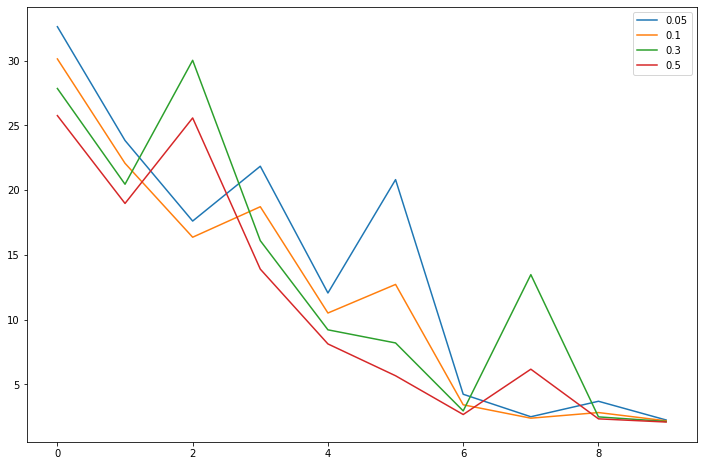

In [114]:
#Plot Descents
plt.figure(figsize = (12,8))
plt.plot(c_h)
plt.legend(alpha)

#### Training and Predicting

In [77]:
#Chose 0.3
model = Multivariate_Regression(0.3,5000)
model.fit(x_train,y_train)
y_pred = np.array(model.predict(x_test)).reshape(-1,1)
np.savetxt('data_testMLR.csv', y_pred, delimiter=',')
y_pred = np.array(model.predict(x_train)).reshape(-1,1)
np.savetxt('data_trainMLR.csv', y_pred,delimiter =',')

In [82]:
#Load data
y_train_MLR = pd.read_csv('data_trainMLR.csv', header=None).to_numpy()
y_test_MLR = pd.read_csv('data_testMLR.csv',header=None).to_numpy()
#Make negaive values zero
for i in range(len(y_train_MLR)):
    if y_train_MLR[i] < 0:
        y_train_MLR[i] = 0
for i in range(len(y_test_MLR)):
    if y_test_MLR[i] < 0:
        y_test_MLR[i] = 0


r2_train_MLR = r2_score(y_train,y_train_MLR)
r2_test_MLR = r2_score(y_test,y_test_MLR)

mse_train_MLR = mean_squared_error(y_train,y_train_MLR)
mse_test_MLR = mean_squared_error(y_test,y_test_MLR)

print("MSE for training data:",mse_train_MLR)
print("MSE for test data:",mse_test_MLR)
print("R2 score for training data:",r2_train_MLR)
print("R2 score for testing data:",r2_test_MLR)

a = np.hstack((y_test_MLR,y_test))
difference = y_test_MLR - y_test
a = np.hstack((a,difference))
table = pd.DataFrame(a, columns=['Predicted', 'Target','Error'])
table.head(10)

MSE for training data: 0.5052625873953893
MSE for test data: 0.8306676831875932
R2 score for training data: 0.29446887106340647
R2 score for testing data: -0.07271498273398169


,Predicted,Target,Error
0,0.002553,0.02,-0.017447
1,0.677047,0.19,0.487047
2,0.905527,0.18,0.725527
3,1.405005,1.41,-0.004995
4,1.045534,0.62,0.425534
5,0.326285,0.40,-0.073715
6,0.836126,0.01,0.826126
7,1.653436,0.90,0.753436
8,0.110906,0.32,-0.209094
9,0.014057,0.03,-0.015943
